In [1]:
#Implementation Of Radial Basis Function For Images

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import datasets

In [2]:
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [3]:
dataset = datasets.ImageFolder('./Dataset', transform=transform)

AttributeError: module 'torch' has no attribute '_six'

In [9]:
trainset = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [10]:
class RBF(nn.Module):

    def __init__(self,input_dim,output_dim,hidden_dim):
        super().__init__()
        self.first_layer = nn.Linear(input_dim,hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim,output_dim)
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.s = 0.02
        self.centers = nn.Parameter(torch.randn(input_dim,hidden_dim))

    def formula(self,x,y):
        return torch.exp(-self.s * (x.unsqueeze(1) - y).pow(2).sum(dim=1))

    def forward(self,x):
        x = x.view(-1, 3*600*600)
        out1 = self.first_layer(x)
        out3 = self.hidden_layer(out1)
        a = self.formula(out3, self.centers)
        return a

In [11]:
model = RBF(input_dim=3*600*600,output_dim=10,hidden_dim=10)
print(model)

RBF(
  (first_layer): Linear(in_features=1080000, out_features=10, bias=True)
  (hidden_layer): Linear(in_features=10, out_features=10, bias=True)
)


In [12]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1): 
    for data in trainset:  
        X, y = data  
        model.zero_grad()  
        output = model(X.view(-1,3*600*600)) 
        loss = loss_function(output, y)  
        loss.backward()  
        optimizer.step() 
        print(loss)  

tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.30

In [13]:

from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter()

In [14]:
import matplotlib.pyplot as plt
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [15]:
dataiter = iter(trainset)

In [16]:
images, labels = next(dataiter)

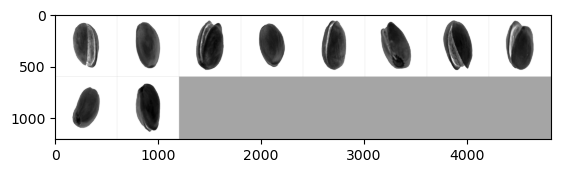

In [17]:
import torchvision
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('pisthachio_images', img_grid)

In [18]:
writer.add_graph(model, images)
writer.close()
n_epochs=10
running_loss=0.0


In [23]:
criterion=nn.CrossEntropyLoss()


In [25]:
for epoch in range(n_epochs):
 train_loss=0.0
 for i , datas in enumerate(trainset,0):
    data,target=datas
    model.train()
    output=model(data)
    loss=criterion(output,target)
    loss.backward()
    train_loss+=loss.item()*data.size(0)
 train_loss=train_loss/len(trainset.dataset)
 running_loss+=loss.item()
 writer.add_scalar('training_loss',running_loss/1000,epoch*len(trainset)+i)
 running_loss=0.0
writer.close()
    

In [26]:
%load_ext tensorboard

In [27]:
%tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 27768), started 5:23:47 ago. (Use '!kill 27768' to kill it.)